In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import poisson 

<u> Question </u> <br> <br>
For this problem we are going to imagine that we are looking for gamma-ray sources (e.g. with the Fermi telescope). In this kind of telescope there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, you need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.

To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).

A) Show how the probability distribution of the background changes as you integrate (sum) for more days.

B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]

<u> Answer </u> <br>
Assumption: average cosmic-ray background; X = 5 <br>
Average number of gamma-rays emitted; Y=10

<b> A.  Evolution of probability distribution over 6 days. </b>

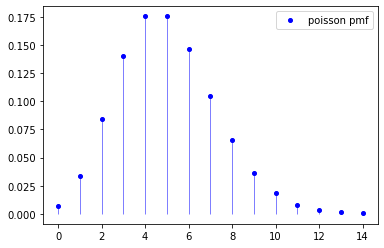

In [2]:
fig, ax = plt.subplots(1, 1)
mu = 5 
x = np.arange(0, 15, 1)
p=poisson.pmf(x, mu)
ax.plot(x, p, 'bo', ms=4, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=1, alpha=0.5)
plt.legend()

In [3]:
n=2
conv_1=np.convolve(p,p)
x1=np.linspace(0,n*15,len(conv_1))

n=3
conv_2=np.convolve(conv_1,p)
x2=np.linspace(0,n*15,len(conv_2))

n=4
conv_3=np.convolve(conv_2,p)
x3=np.linspace(0,n*15,len(conv_3))

n=5
conv_4=np.convolve(conv_3,p)
x4=np.linspace(0,n*15,len(conv_4))

n=6
conv_5=np.convolve(conv_4,p)
x5=np.linspace(0,n*15,len(conv_5))


Text(0, 0.5, 'Probability')

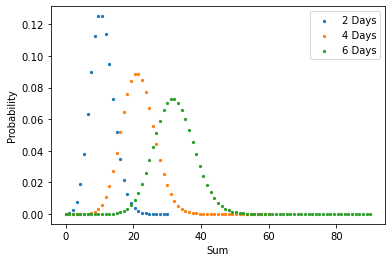

In [4]:
fig,ax=plt.subplots()

a1=ax.scatter(x1,conv_1,label="2 Days",s=5)
a3=ax.scatter(x3,conv_3,label="4 Days",s=5)
a5=ax.scatter(x5,conv_5,label="6 Days",s=5)
ax.legend()
ax.set_xlabel("Sum")
ax.set_ylabel("Probability")

Text(0, 0.5, 'Probability (log scale)')

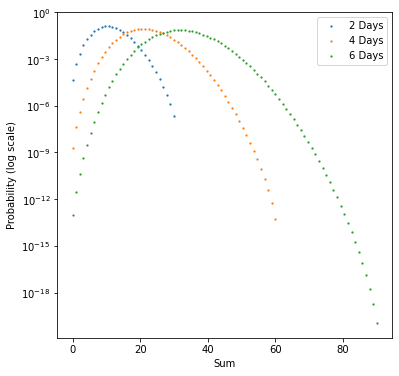

In [5]:
fig,ax=plt.subplots(figsize=(6,6))
a1=ax.scatter(x1,conv_1,label="2 Days",s=1.5)
a3=ax.scatter(x3,conv_3,label="4 Days",s=1.5)
a5=ax.scatter(x5,conv_5,label="6 Days",s=1.5)
ax.set_yscale("log")                            # Same thing on a log scale
plt.legend()
ax.set_xlabel("Sum")
ax.set_ylabel("Probability (log scale)")

<b> B. Summed pdf after 5 days </b>


Text(0, 0.5, 'Probability')

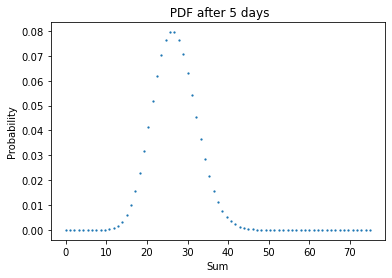

In [6]:
fig,ax=plt.subplots()
a5=ax.scatter(x4,conv_4,label="pdf summed over 5 days",s=1.5)
ax.set_title(" PDF after 5 days")
ax.set_xlabel("Sum")
ax.set_ylabel("Probability")

Text(0, 0.5, 'Probability (log scale)')

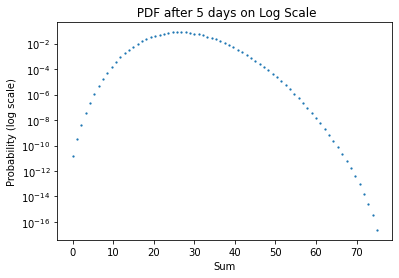

In [7]:
fig,ax=plt.subplots()
a5=ax.scatter(x4,conv_4,label="pdf summed over 5 days",s=1.5)
ax.set_title(" PDF after 5 days on Log Scale")
ax.set_yscale("log")
ax.set_xlabel("Sum")
ax.set_ylabel("Probability (log scale)")

This is not a gaussian since it is not a perfect parabola on a log scale. It looks very similar because of the Central Limit Theorem which states that when independent random variables are summed up, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed.

<b> Mathematical Explanation </b>
Mathematically, the convolution independent Poisson distributions with mu=mu_n is still a Poisson distribution with mu=mu_1+mu_2+mu_3+....mu_n. This can be verified using the equations.  <br>
<b> Conceptual Explanation </b>
The distribution is discrete,unlike a gaussian. Summing discrete objects does not give a continuous output. 

<b> C. </br> Probability distribution evolution on averaging days. </b>

To find the average, we must rescale the x axis of the distribution first so that the output values stay consistent.

In [8]:
# Rescaling 
# Rescale the x axis by the number of convolutions. 
ax1=x1/2
c1=conv_1 # average of 2 days 
ax2=x2/3
c2=conv_2 # average of 3 days 
ax3=x3/4
c3=conv_3 # average of 4 days 
ax4=x4/5
c4=conv_4 # average of 5 days 
ax5=x5/6
c5=conv_5 # average of 6 days 


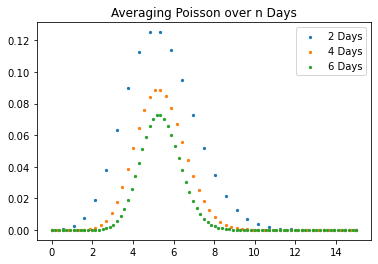

In [9]:
fig,ax=plt.subplots()

a1=ax.scatter(ax1,c1,label="2 Days",s=5)
a3=ax.scatter(ax3,c3,label="4 Days",s=5)
a5=ax.scatter(ax5,c5,label="6 Days",s=5)
ax.set_title("Averaging Poisson over n Days")
plt.legend()

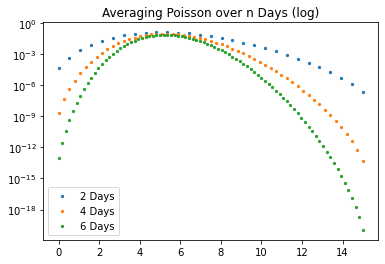

In [10]:
fig,ax=plt.subplots()

a1=ax.scatter(ax1,c1,label="2 Days",s=5)
a3=ax.scatter(ax3,c3,label="4 Days",s=5)
a5=ax.scatter(ax5,c5,label="6 Days",s=5)
ax.set_yscale("log")
ax.set_title("Averaging Poisson over n Days (log)")
plt.legend()


As the number of days increases, the height and width of the distribution decreases but the distribution moves towards a Gaussian shape. This is in agreement witht the Central Limit Theorem. However, it is still a poissonian for the reasons descussed in B.  

<b> D. </b> <br>
Number of Days ; N=5 <br>
Total gamma rays; G=10*5 = 50 


Text(0, 0.5, 'Probability')

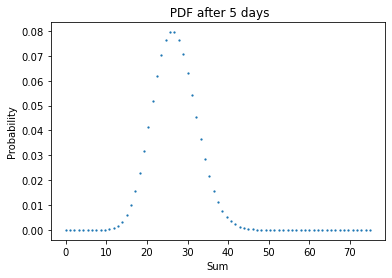

In [11]:
# Picturing background
fig,ax=plt.subplots()
a5=ax.scatter(x4,conv_4,label="pdf summed over 5 days",s=1.5)
ax.set_title(" PDF after 5 days")
ax.set_xlabel("Sum")
ax.set_ylabel("Probability")

In [12]:
count=[]
for i in range(len(x4)):
    if x4[i]>=50:
        count.append(i)         # indexes for which sum >= 50
P=np.sum(conv_4[count])        # Prrobability of getting a sum >=50
Sigma=stats.norm.ppf(P)        # Mapping to Gaussian
print ("Sigma: ", abs(Sigma))  # Negative since we're counting up. It doesn't matter in this case so can take abs(Sigma)

Sigma:  3.925725604858213


<b> Problem 2 </b> <br> <br>
<b> A. </b>

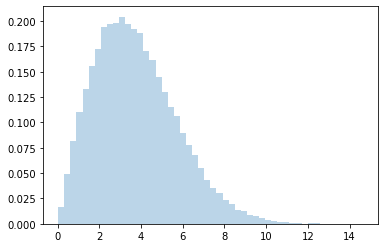

In [13]:
mu=3
heights,borders,patches = plt.hist(np.random.rayleigh(3, 100000), bins=50,alpha=0.3, density=True)

In [14]:
dx=borders[1]-borders[0]
p=heights*dx
print (np.sum(p), " #Checking probability sum")

n=1
c1=p
ax1=np.linspace(0,n*15,len(c1))/n

n=2
c2=np.convolve(c1,p)
ax2=np.linspace(0,n*15,len(c2))/n

n=3
c3=np.convolve(c2,p)
ax3=np.linspace(0,n*15,len(c3))/n

n=4
c4=np.convolve(c3,p)
ax4=np.linspace(0,n*15,len(c4))/n

n=5
c5=np.convolve(c4,p)
ax5=np.linspace(0,n*15,len(c5))/n

n=6
c6=np.convolve(c5,p)
ax6=np.linspace(0,n*15,len(c6))/n

n=7
c7=np.convolve(c6,p)
ax7=np.linspace(0,n*15,len(c7))/n

n=8
c8=np.convolve(c7,p)
ax8=np.linspace(0,n*15,len(c8))/n

1.0  #Checking probability sum


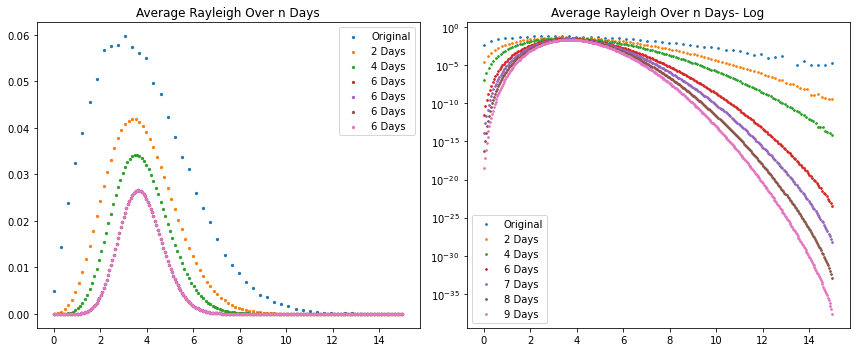

In [15]:
fig,(ax,aax1)=plt.subplots(1,2,figsize=(12,5))
a0=ax.scatter(ax1,c1,label="Original",s=5)
a1=ax.scatter(ax2,c2,label="2 Days",s=5)
a3=ax.scatter(ax3,c3,label="4 Days",s=5)
a5=ax.scatter(ax5,c5,label="6 Days",s=5)
a5=ax.scatter(ax5,c5,label="6 Days",s=5)
a5=ax.scatter(ax5,c5,label="6 Days",s=5)
a5=ax.scatter(ax5,c5,label="6 Days",s=5)
ax.set_title("Average Rayleigh Over n Days")

la0=aax1.scatter(ax1,c1,label="Original",s=3)
la1=aax1.scatter(ax2,c2,label="2 Days",s=3)
la3=aax1.scatter(ax3,c3,label="4 Days",s=3)
la5=aax1.scatter(ax5,c5,label="6 Days",s=3)
la6=aax1.scatter(ax6,c6,label="7 Days",s=3)
la7=aax1.scatter(ax7,c7,label="8 Days",s=3)
la8=aax1.scatter(ax8,c8,label="9 Days",s=3)
aax1.set_title("Average Rayleigh Over n Days- Log")
aax1.set_yscale("log")
aax1.legend()
ax.legend()
fig.tight_layout()

In [16]:
np.sum(c5) #Checking Convolution

1.0

<b> B. </b> <br>
<u>Answer <br> </u>

The peak gets narrower, shorter and more Gaussian,esppecially affter <b> 6 days </b>, on averaging over more observing intervals. However, we can deduce from the log scale that Rayleigh average approaches a Gaussian much slower than Poisson. Even at 9 days, it is not a good parabola on the log scale.

<b> Problem 3 </b> <br>
<u>Question <br> </u>
For this problem let's assume that we are using an optical telescope with a thermal noise background from the CCD (dark current, particularly an issue with older CCDs and/or infra-red CCDs). After flat-fielding, the background appears as a zero-mean Gaussian with constant width over the image. <br>

> <b> Version 1 </b>
You have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives you a very precise location, so you take an image of that part of the sky. But because of SWIFT's accuracy, you know which pixel in your image to look for a counterpart in. <br>

> <b>A. </b> <br>
From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

<u>Answer <br> </u>

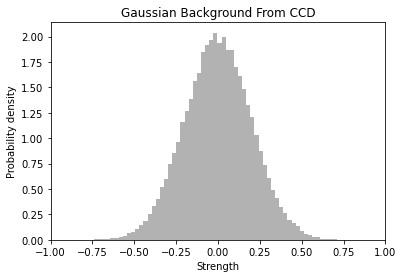

In [17]:
fig, ax = plt.subplots(1, 1)
width=0.2
d = stats.norm.rvs(loc = 0, scale = width, size = 100000)
heights,borders,patches=ax.hist(d,70, density=True,alpha=0.3,color="k")
plt.xlim([-1,1])
#x = np.linspace(-1,1,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 0, scale = width),linewidth = 1,alpha = 0.7)
ax.set_xlabel("Strength")
ax.set_ylabel("Probability density")
title=ax.set_title("Gaussian Background From CCD")

<b> Statistical question </b>: What is the probability that the background produces a signal strength of Y or more? Is this statistically significant?


In [18]:
Y=0.8
cdf=stats.norm.cdf(Y,loc=0,scale=width)
P=1-cdf
sigma=stats.norm.ppf(P)
print ("Sigma:",abs(sigma))

Sigma: 4.0


This is <b> not statistically significant </b>for physicists as absolute value of Sigma < 5. Thus, cannot claim discovery.

<u>Question. <br> </u>
> <b> Version 2 </b> <br>
You have an alert from LIGO, but no associated detection from SWIFT. This could be because it is a black hole-black hole merger, a black hole-neutron star merger (neither seem to emit X-rays or UV light), or it could because SWIFT was indisposed at the time (wrong side of the earth in its orbit). Whatever the cause, you know what region of the sky to look in, but not which pixel.

> <b> B. </b> <br> If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

<u>Answer <br> </u>
<b> Statistical Question </b> : What does the probability distribution of background look like for 10k pixels?

Text(0.5, 1.0, 'Background from 10k pixels')

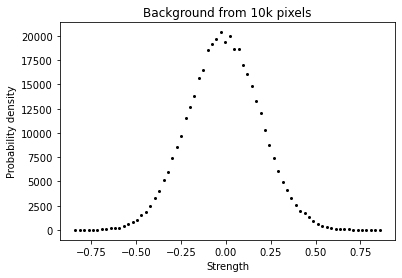

In [37]:
dx=borders[1]-borders[0]
p_10k=heights*10000
plt.plot(borders[:-1],p_10k,"ko",ms=2)
plt.xlabel("Strength")
plt.ylabel("Probability density")
plt.title("Background from 10k pixels")

In [32]:
import scipy.optimize
from scipy.optimize import curve_fit

<b> C. </b> <br> 
<u>Question <br> </u>
 Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

<u>Answer <br> </u>

In [38]:
Y=0.8
cdf=stats.norm.cdf(Y,loc=0,scale=width)
P=(1-cdf)*10000
sigma=stats.norm.ppf(P)
print ("Sigma:",abs(sigma))

Sigma: 0.47691192965346846


As expected, Sigma reducuce meaning it is much more likely that for the background to give the fluke in signal.

<b> 4. </b> <br>
<u> Question. </u> <br>

The statistical issue we were exploring in the previous problem is called a trials factor (sometimes known as a look-elsewhere effect). This is an important effect, as if you search through a million locations, you would expect to se ~1 one in a million event. However, it is also often over estimated how big an impact this makes on the sensitivity of a search. So in this part of the lab we are going to invert the problem.

Let us again assume we have a Gaussian background (same parameters as Problem 3).

A) Calculate the signal required for a 5-sigma detection in Version 1

B) Calculate the signal required for a 5-sigma detection in Version 2

C) Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.

D) If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

Extra credit: If you had a different distribution shape (non-Gaussian), how would that affect the sensitivity penalty of many trials? Clearly explain.

<b> A. </b>

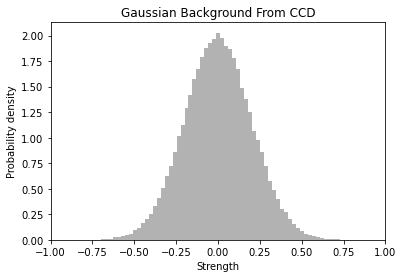

In [42]:
fig, ax = plt.subplots(1, 1)
width=0.2
d = stats.norm.rvs(loc = 0, scale = width, size = 100000)
heights,borders,patches=ax.hist(d,70, density=True,alpha=0.3,color="k")
plt.xlim([-1,1])
ax.set_xlabel("Strength")
ax.set_ylabel("Probability density")
title=ax.set_title("Gaussian Background From CCD")

In [43]:
cdf=stats.norm.cdf(5,loc=0,scale=width)
cdf

1.0

<b> B. </b>

In [41]:
cdf=stats.norm.cdf(5,loc=0,scale=width)
cdf

9999.997133484281

<b> C. </b> <br><br> 
At 5 sigma, we need a much 1000 times brighter signal. 

<b> D. </b> <br>
Very little effect. 
